In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow
from tensorflow import keras
from keras.layers import Dense

In [ ]:
data = pd.read_excel("National_Accidents_Australia.xlsx")

In [ ]:
label_encoder = LabelEncoder()
data['Month'] = label_encoder.fit_transform(data['Month'])
data['ABS remoteness area'] = label_encoder.fit_transform(data['ABS remoteness area'])
data['Cause of injury'] = label_encoder.fit_transform(data['Cause of injury'])
data['Age group'] = label_encoder.fit_transform(data['Age group'])
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Road user'] = label_encoder.fit_transform(data['Road user'])
data['Counterparty'] = label_encoder.fit_transform(data['Counterparty'])


In [ ]:
data['Died_cases'].fillna(0, inplace=True)

data['Died_bed_days'].fillna(0, inplace=True)

data.dropna(subset=['Count of cases'], inplace=True)


data.head()

,Calendar year,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
0,2011,0,0,0,0,0,8,5,765.0,1007,0.0,0.0,765
1,2011,0,0,0,0,1,8,5,1010.0,1694,0.0,0.0,1010
2,2011,0,0,0,1,0,8,5,859.0,1597,0.0,0.0,859
3,2011,0,0,0,1,1,8,5,2231.0,3878,2.0,3.0,2229
4,2011,0,0,0,2,0,8,5,1098.0,2347,1.0,14.0,1097


In [ ]:
data['Bed_days_category'] = np.where(data['Bed days'] >= 30, 1, 0)
data['Bed_days_category'].value_counts()

0    74918
1    38064
Name: Bed_days_category, dtype: int64

**Learn With Perceptron CLASSIFICATION Normaly  :**

In [ ]:
X = data[['ABS remoteness area','Age group','Sex','Road user','Cause of injury']]
y = data['Bed_days_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=5))
model.add(Dense(units=1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
2472/2472 [==============================] - 14s 5ms/step - loss: 0.5063 - accuracy: 0.7804 - val_loss: 0.4808 - val_accuracy: 0.7821
Epoch 2/20
2472/2472 [==============================] - 14s 6ms/step - loss: 0.4695 - accuracy: 0.7846 - val_loss: 0.4635 - val_accuracy: 0.7839
Epoch 3/20
2472/2472 [==============================] - 6s 2ms/step - loss: 0.4536 - accuracy: 0.7904 - val_loss: 0.4493 - val_accuracy: 0.7972
Epoch 4/20
2472/2472 [==============================] - 6s 2ms/step - loss: 0.4435 - accuracy: 0.7956 - val_loss: 0.4429 - val_accuracy: 0.8001
Epoch 5/20
2472/2472 [==============================] - 5s 2ms/step - loss: 0.4352 - accuracy: 0.7998 - val_loss: 0.4604 - val_accuracy: 0.7842
Epoch 6/20
2472/2472 [==============================] - 5s 2ms/step - loss: 0.4291 - accuracy: 0.8030 - val_loss: 0.4421 - val_accuracy: 0.7956
Epoch 7/20
2472/2472 [==============================] - 6s 2ms/step - loss: 0.4242 - accuracy: 0.8052 - val_loss: 0.4231 - val_accurac

In [ ]:
predictions = model.predict(X_test)

binary_predictions = (predictions > 0.5).astype(int)

precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
acc = accuracy_score(y_test, binary_predictions)


print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(acc)

1060/1060 [==============================] - 1s 1ms/step
Precision: 0.7626721359507764
Recall: 0.6812352787228474
F1 Score: 0.7196571744539675
0.8205044991886709


**Learn with CNN** CLASSIFICATION Normaly **bold text**

In [ ]:
import torch

from torch import nn
from torch.utils.data import Dataset, DataLoader

In [ ]:
def get_device():
    return torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

device = get_device()
device

device(type='cpu')

In [ ]:
class CNNModel(nn.Module):
    def __init__(self, n_features, num_classes):
        super(CNNModel, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(64 * (n_features - 3 + 1), 64)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.conv1(x)
        x = self.relu(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
class SimpleData(Dataset):
    def __init__(self, x, y, transform=None, target_transform=None) -> None:
        self.x = x
        self.y=y
        self.transform=transform
        self.target_transform = target_transform


    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        if self.transform:
            self.x = self.transform(self.x)
        if self.target_transform:
            self.y = self.target_transform(self.y)

        return self.x[index], self.y[index]

In [ ]:
x = data[['ABS remoteness area','Age group','Sex','Road user','Cause of injury']].values
y = data['Bed_days_category'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [ ]:
x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train)

x_test = torch.Tensor(x_test)
y_test = torch.Tensor(y_test)

train_data = SimpleData(x_train, y_train)
test_data = SimpleData(x_test, y_test)

train_dl = DataLoader(train_data, batch_size=32, shuffle=True)
test_dl = DataLoader(test_data, batch_size=32, shuffle=True)

In [ ]:
n_features = x_train.shape[1]
num_classes = 2

model = CNNModel(n_features, num_classes)
model

CNNModel(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,))
  (relu): ReLU()
  (fc1): Linear(in_features=192, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
epochs = 10

model.train()
for epoch in range(epochs):
    losses = list()
    for input_data, labels in train_dl:
        optimizer.zero_grad()

        input_data = input_data.to(device).float()
        labels = labels.to(device)

        output = model(input_data)
        labels = labels.type(torch.LongTensor)
        loss = criterion(output, labels)
        loss.backward()
        losses.append(loss.item())
        optimizer.step()

    print(f'Epoch {epoch + 1} | Loss {round(sum(losses) / len(losses), 4)}')

Epoch 1 | Loss 0.4627
Epoch 2 | Loss 0.4107
Epoch 3 | Loss 0.3876
Epoch 4 | Loss 0.3776
Epoch 5 | Loss 0.3742
Epoch 6 | Loss 0.3699
Epoch 7 | Loss 0.3675
Epoch 8 | Loss 0.3647
Epoch 9 | Loss 0.3639
Epoch 10 | Loss 0.3611


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

model.eval()
total_correct = 0
total_samples = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for test_data, test_labels in test_dl:
        test_outputs = model(test_data)
        _, predicted = torch.max(test_outputs, 1)
        total_correct += (predicted == test_labels).sum().item()
        total_samples += test_labels.size(0)
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(test_labels.cpu().numpy())

accuracy = total_correct / total_samples
print(f'Test Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(all_labels, all_predicted, average='binary')
recall = recall_score(all_labels, all_predicted, average='binary')
f1 = f1_score(all_labels, all_predicted, average='binary')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Test Accuracy: 82.85%
Precision: 0.8834
Recall: 0.5677
F1-score: 0.6912


CLASSIFICATION WITH ROAD USERS 8.  perceptron
---> Not applicable



In [ ]:
filtered_data = data[data['Road user'] == 8]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = (filtered_data['Bed days'] > 30).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=3))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
688/688 [==============================] - 3s 3ms/step - loss: 28.3134 - accuracy: 0.8469 - val_loss: 0.2101 - val_accuracy: 0.9148
Epoch 2/20
688/688 [==============================] - 2s 3ms/step - loss: 0.1955 - accuracy: 0.9151 - val_loss: 0.1902 - val_accuracy: 0.9161
Epoch 3/20
688/688 [==============================] - 3s 4ms/step - loss: 0.1897 - accuracy: 0.9168 - val_loss: 0.1891 - val_accuracy: 0.9163
Epoch 4/20
688/688 [==============================] - 2s 3ms/step - loss: 0.1890 - accuracy: 0.9165 - val_loss: 0.1888 - val_accuracy: 0.9163
Epoch 5/20
688/688 [==============================] - 2s 3ms/step - loss: 0.1886 - accuracy: 0.9168 - val_loss: 0.1886 - val_accuracy: 0.9163
Epoch 6/20
688/688 [==============================] - 3s 4ms/step - loss: 0.1883 - accuracy: 0.9173 - val_loss: 0.1888 - val_accuracy: 0.9163
Epoch 7/20
688/688 [==============================] - 2s 3ms/step - loss: 0.1881 - accuracy: 0.9172 - val_loss: 0.1885 - val_accuracy: 0.9162
Epoch

In [ ]:
predictions = model.predict(X_test)

binary_predictions = (predictions > 0.5).astype(int)

precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
acc = accuracy_score(y_test, binary_predictions)


print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(acc)

295/295 [==============================] - 0s 1ms/step
Precision: 0.9523499756057896
Recall: 0.9211892402076451
F1 Score: 0.9365104749720135
0.9157649055803098


**bold text**
Learn with CNN 8---> Not applicable

In [ ]:
filtered_data = data[data['Road user'] == 8]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']].values
y = (filtered_data['Bed days'] > 30).astype(int).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [ ]:
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

train_data = SimpleData(X_train, y_train)
test_data = SimpleData(X_test, y_test)

train_dl = DataLoader(train_data, batch_size=32, shuffle=True)
test_dl = DataLoader(test_data, batch_size=32, shuffle=True)

In [ ]:
n_features = X_train.shape[1]
num_classes = 2

model = CNNModel(n_features, num_classes)
model

CNNModel(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,))
  (relu): ReLU()
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
epochs = 10

model.train()
for epoch in range(epochs):
    losses = list()
    for input_data, labels in train_dl:
        optimizer.zero_grad()

        input_data = input_data.to(device).float()
        labels = labels.to(device)

        output = model(input_data)
        labels = labels.type(torch.LongTensor)
        loss = criterion(output, labels)
        loss.backward()
        losses.append(loss.item())
        optimizer.step()

    print(f'Epoch {epoch + 1} | Loss {round(sum(losses) / len(losses), 4)}')

Epoch 1 | Loss 1.6153
Epoch 2 | Loss 0.1907
Epoch 3 | Loss 0.1894
Epoch 4 | Loss 0.1891
Epoch 5 | Loss 0.1891
Epoch 6 | Loss 0.1888
Epoch 7 | Loss 0.1896
Epoch 8 | Loss 0.1885
Epoch 9 | Loss 0.189
Epoch 10 | Loss 0.1882


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

model.eval()
total_correct = 0
total_samples = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for test_data, test_labels in test_dl:
        test_outputs = model(test_data)
        _, predicted = torch.max(test_outputs, 1)
        total_correct += (predicted == test_labels).sum().item()
        total_samples += test_labels.size(0)
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(test_labels.cpu().numpy())

accuracy = total_correct / total_samples
print(f'Test Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(all_labels, all_predicted, average='binary')
recall = recall_score(all_labels, all_predicted, average='binary')
f1 = f1_score(all_labels, all_predicted, average='binary')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Test Accuracy: 91.53%
Precision: 0.9506
Recall: 0.9206
F1-score: 0.9353


perceptron
CLASSIFICATION WITH ROAD USERS 1---> Car driver

In [ ]:
filtered_data = data[data['Road user'] == 1]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = (filtered_data['Bed days'] > 30).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=3))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
352/352 [==============================] - 2s 4ms/step - loss: 0.4809 - accuracy: 0.7977 - val_loss: 0.3567 - val_accuracy: 0.8539
Epoch 2/20
352/352 [==============================] - 1s 3ms/step - loss: 0.3508 - accuracy: 0.8483 - val_loss: 0.3413 - val_accuracy: 0.8539
Epoch 3/20
352/352 [==============================] - 1s 3ms/step - loss: 0.3430 - accuracy: 0.8498 - val_loss: 0.3478 - val_accuracy: 0.8586
Epoch 4/20
352/352 [==============================] - 1s 3ms/step - loss: 0.3417 - accuracy: 0.8513 - val_loss: 0.3380 - val_accuracy: 0.8530
Epoch 5/20
352/352 [==============================] - 1s 3ms/step - loss: 0.3406 - accuracy: 0.8482 - val_loss: 0.3372 - val_accuracy: 0.8530
Epoch 6/20
352/352 [==============================] - 1s 3ms/step - loss: 0.3389 - accuracy: 0.8486 - val_loss: 0.3386 - val_accuracy: 0.8565
Epoch 7/20
352/352 [==============================] - 1s 3ms/step - loss: 0.3396 - accuracy: 0.8483 - val_loss: 0.3376 - val_accuracy: 0.8530
Epoch 

In [ ]:
predictions = model.predict(X_test)

binary_predictions = (predictions > 0.5).astype(int)

precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
acc = accuracy_score(y_test, binary_predictions)


print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(acc)

151/151 [==============================] - 0s 1ms/step
Precision: 0.8246539222148979
Recall: 0.7464200477326969
F1 Score: 0.7835891011587848
0.8565497197425783


CNN
CLASSIFICATION WITH ROAD USERS 1---> Car driver

In [ ]:
filtered_data = data[data['Road user'] == 1]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']].values
y = (filtered_data['Bed days'] > 30).astype(int).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [ ]:
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

train_data = SimpleData(X_train, y_train)
test_data = SimpleData(X_test, y_test)

train_dl = DataLoader(train_data, batch_size=32, shuffle=True)
test_dl = DataLoader(test_data, batch_size=32, shuffle=True)

In [ ]:
n_features = X_train.shape[1]
num_classes = 2

model = CNNModel(n_features, num_classes)
model

CNNModel(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,))
  (relu): ReLU()
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
epochs = 20

model.train()
for epoch in range(epochs):
    losses = list()
    for input_data, labels in train_dl:
        optimizer.zero_grad()

        input_data = input_data.to(device).float()
        labels = labels.to(device)

        output = model(input_data)
        labels = labels.type(torch.LongTensor)
        loss = criterion(output, labels)
        loss.backward()
        losses.append(loss.item())
        optimizer.step()

    print(f'Epoch {epoch + 1} | Loss {round(sum(losses) / len(losses), 4)}')

Epoch 1 | Loss 0.3745
Epoch 2 | Loss 0.3373
Epoch 3 | Loss 0.3362
Epoch 4 | Loss 0.3367
Epoch 5 | Loss 0.3359
Epoch 6 | Loss 0.3346
Epoch 7 | Loss 0.3341
Epoch 8 | Loss 0.3334
Epoch 9 | Loss 0.3336
Epoch 10 | Loss 0.3354
Epoch 11 | Loss 0.3336
Epoch 12 | Loss 0.333
Epoch 13 | Loss 0.3323
Epoch 14 | Loss 0.3334
Epoch 15 | Loss 0.3331
Epoch 16 | Loss 0.3325
Epoch 17 | Loss 0.3329
Epoch 18 | Loss 0.3328
Epoch 19 | Loss 0.3312
Epoch 20 | Loss 0.3318


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

model.eval()
total_correct = 0
total_samples = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for test_data, test_labels in test_dl:
        test_outputs = model(test_data)
        _, predicted = torch.max(test_outputs, 1)
        total_correct += (predicted == test_labels).sum().item()
        total_samples += test_labels.size(0)
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(test_labels.cpu().numpy())

accuracy = total_correct / total_samples
print(f'Test Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(all_labels, all_predicted, average='binary')
recall = recall_score(all_labels, all_predicted, average='binary')
f1 = f1_score(all_labels, all_predicted, average='binary')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Test Accuracy: 84.62%
Precision: 0.8153
Recall: 0.7283
F1-score: 0.7694


perceptron CLASSIFICATION WITH ROAD USERS 2---> Car passenger

In [ ]:
filtered_data = data[data['Road user'] == 2]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = (filtered_data['Bed days'] > 30).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=3))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
326/326 [==============================] - 2s 3ms/step - loss: 0.4815 - accuracy: 0.8548 - val_loss: 0.3550 - val_accuracy: 0.8660
Epoch 2/20
326/326 [==============================] - 1s 2ms/step - loss: 0.3447 - accuracy: 0.8683 - val_loss: 0.3382 - val_accuracy: 0.8678
Epoch 3/20
326/326 [==============================] - 1s 2ms/step - loss: 0.3397 - accuracy: 0.8695 - val_loss: 0.3418 - val_accuracy: 0.8676
Epoch 4/20
326/326 [==============================] - 1s 2ms/step - loss: 0.3406 - accuracy: 0.8694 - val_loss: 0.3375 - val_accuracy: 0.8683
Epoch 5/20
326/326 [==============================] - 1s 3ms/step - loss: 0.3394 - accuracy: 0.8682 - val_loss: 0.3368 - val_accuracy: 0.8687
Epoch 6/20
326/326 [==============================] - 1s 4ms/step - loss: 0.3389 - accuracy: 0.8694 - val_loss: 0.3383 - val_accuracy: 0.8665
Epoch 7/20
326/326 [==============================] - 2s 5ms/step - loss: 0.3387 - accuracy: 0.8687 - val_loss: 0.3371 - val_accuracy: 0.8712
Epoch 

In [ ]:
predictions = model.predict(X_test)

binary_predictions = (predictions > 0.5).astype(int)

precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
acc = accuracy_score(y_test, binary_predictions)


print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(acc)

140/140 [==============================] - 0s 1ms/step
Precision: 0.6676557863501483
Recall: 0.32514450867052025
F1 Score: 0.43731778425655976
0.8702666367913959


CNN CLASSIFICATION WITH ROAD USERS 2---> Car passenger

In [ ]:
filtered_data = data[data['Road user'] == 2]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']].values
y = (filtered_data['Bed days'] > 30).astype(int).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

train_data = SimpleData(X_train, y_train)
test_data = SimpleData(X_test, y_test)

train_dl = DataLoader(train_data, batch_size=32, shuffle=True)
test_dl = DataLoader(test_data, batch_size=32, shuffle=True)

In [ ]:
n_features = X_train.shape[1]
num_classes = 2

model = CNNModel(n_features, num_classes)
model

CNNModel(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,))
  (relu): ReLU()
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
epochs = 20

model.train()
for epoch in range(epochs):
    losses = list()
    for input_data, labels in train_dl:
        optimizer.zero_grad()

        input_data = input_data.to(device).float()
        labels = labels.to(device)

        output = model(input_data)
        labels = labels.type(torch.LongTensor)
        loss = criterion(output, labels)
        loss.backward()
        losses.append(loss.item())
        optimizer.step()

    print(f'Epoch {epoch + 1} | Loss {round(sum(losses) / len(losses), 4)}')

Epoch 1 | Loss 0.3699
Epoch 2 | Loss 0.3379
Epoch 3 | Loss 0.3355
Epoch 4 | Loss 0.3361
Epoch 5 | Loss 0.3368
Epoch 6 | Loss 0.3349
Epoch 7 | Loss 0.3351
Epoch 8 | Loss 0.3346
Epoch 9 | Loss 0.3351
Epoch 10 | Loss 0.3362
Epoch 11 | Loss 0.3345
Epoch 12 | Loss 0.3335
Epoch 13 | Loss 0.3345
Epoch 14 | Loss 0.3334
Epoch 15 | Loss 0.3333
Epoch 16 | Loss 0.3338
Epoch 17 | Loss 0.3336
Epoch 18 | Loss 0.333
Epoch 19 | Loss 0.3334
Epoch 20 | Loss 0.3335


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

model.eval()
total_correct = 0
total_samples = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for test_data, test_labels in test_dl:
        test_outputs = model(test_data)
        _, predicted = torch.max(test_outputs, 1)
        total_correct += (predicted == test_labels).sum().item()
        total_samples += test_labels.size(0)
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(test_labels.cpu().numpy())

accuracy = total_correct / total_samples
print(f'Test Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(all_labels, all_predicted, average='binary')
recall = recall_score(all_labels, all_predicted, average='binary')
f1 = f1_score(all_labels, all_predicted, average='binary')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Test Accuracy: 86.78%
Precision: 0.7143
Recall: 0.2875
F1-score: 0.4100


 PERCEPTRON CLASSIFICATION WITH ROAD USERS 10---> Pedal cyclist

In [ ]:
filtered_data = data[data['Road user'] == 10]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = (filtered_data['Bed days'] > 30).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=3))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
313/313 [==============================] - 2s 5ms/step - loss: 0.4471 - accuracy: 0.9086 - val_loss: 0.2669 - val_accuracy: 0.9206
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 0.2334 - accuracy: 0.9203 - val_loss: 0.2298 - val_accuracy: 0.9208
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 0.2224 - accuracy: 0.9205 - val_loss: 0.2276 - val_accuracy: 0.9213
Epoch 4/20
313/313 [==============================] - 1s 5ms/step - loss: 0.2213 - accuracy: 0.9216 - val_loss: 0.2367 - val_accuracy: 0.9185
Epoch 5/20
313/313 [==============================] - 1s 4ms/step - loss: 0.2210 - accuracy: 0.9205 - val_loss: 0.2383 - val_accuracy: 0.9171
Epoch 6/20
313/313 [==============================] - 1s 2ms/step - loss: 0.2212 - accuracy: 0.9213 - val_loss: 0.2278 - val_accuracy: 0.9206
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 0.2212 - accuracy: 0.9210 - val_loss: 0.2269 - val_accuracy: 0.9215
Epoch 

In [ ]:
predictions = model.predict(X_test)

binary_predictions = (predictions > 0.5).astype(int)

precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
acc = accuracy_score(y_test, binary_predictions)


print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(acc)
print(y.value_counts())


135/135 [==============================] - 0s 1ms/step
Precision: 0.842809364548495
Recall: 0.46408839779005523
F1 Score: 0.5985748218527315
0.9212671791288144
0    12505
1     1804
Name: Bed days, dtype: int64


CNN CLASSIFICATION WITH ROAD USERS 10---> Pedal cyclist

In [ ]:
filtered_data = data[data['Road user'] == 10]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']].values
y = (filtered_data['Bed days'] > 30).astype(int).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

train_data = SimpleData(X_train, y_train)
test_data = SimpleData(X_test, y_test)

train_dl = DataLoader(train_data, batch_size=32, shuffle=True)
test_dl = DataLoader(test_data, batch_size=32, shuffle=True)

In [ ]:
n_features = X_train.shape[1]
num_classes = 2

model = CNNModel(n_features, num_classes)
model

CNNModel(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,))
  (relu): ReLU()
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
epochs = 20

model.train()
for epoch in range(epochs):
    losses = list()
    for input_data, labels in train_dl:
        optimizer.zero_grad()

        input_data = input_data.to(device).float()
        labels = labels.to(device)

        output = model(input_data)
        labels = labels.type(torch.LongTensor)
        loss = criterion(output, labels)
        loss.backward()
        losses.append(loss.item())
        optimizer.step()

    print(f'Epoch {epoch + 1} | Loss {round(sum(losses) / len(losses), 4)}')

Epoch 1 | Loss 0.278
Epoch 2 | Loss 0.2277
Epoch 3 | Loss 0.2253
Epoch 4 | Loss 0.2254
Epoch 5 | Loss 0.2252
Epoch 6 | Loss 0.224
Epoch 7 | Loss 0.2257
Epoch 8 | Loss 0.2235
Epoch 9 | Loss 0.2247
Epoch 10 | Loss 0.224
Epoch 11 | Loss 0.2228
Epoch 12 | Loss 0.2216
Epoch 13 | Loss 0.2212
Epoch 14 | Loss 0.2222
Epoch 15 | Loss 0.2213
Epoch 16 | Loss 0.2226
Epoch 17 | Loss 0.2222
Epoch 18 | Loss 0.2227
Epoch 19 | Loss 0.2214
Epoch 20 | Loss 0.2221


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

model.eval()
total_correct = 0
total_samples = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for test_data, test_labels in test_dl:
        test_outputs = model(test_data)
        _, predicted = torch.max(test_outputs, 1)
        total_correct += (predicted == test_labels).sum().item()
        total_samples += test_labels.size(0)
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(test_labels.cpu().numpy())

accuracy = total_correct / total_samples
print(f'Test Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(all_labels, all_predicted, average='binary')
recall = recall_score(all_labels, all_predicted, average='binary')
f1 = f1_score(all_labels, all_predicted, average='binary')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(y.shape)



Test Accuracy: 92.24%
Precision: 0.7895
Recall: 0.5085
F1-score: 0.6186
(14309,)


PERCEPTRON CLASSIFICATION WITH ROAD USERS 7---> Motorcyclist

In [ ]:
filtered_data = data[data['Road user'] == 7]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = (filtered_data['Bed days'] > 30).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=3))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
filtered_data = data[data['Road user'] == 7]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = (filtered_data['Bed days'] > 30).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=3))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
306/306 [==============================] - 3s 6ms/step - loss: 0.4407 - accuracy: 0.8446 - val_loss: 0.3354 - val_accuracy: 0.8698
Epoch 2/20
306/306 [==============================] - 1s 2ms/step - loss: 0.3187 - accuracy: 0.8763 - val_loss: 0.3240 - val_accuracy: 0.8686
Epoch 3/20
306/306 [==============================] - 1s 2ms/step - loss: 0.3154 - accuracy: 0.8768 - val_loss: 0.3313 - val_accuracy: 0.8724
Epoch 4/20
306/306 [==============================] - 1s 3ms/step - loss: 0.3145 - accuracy: 0.8769 - val_loss: 0.3241 - val_accuracy: 0.8724
Epoch 5/20
306/306 [==============================] - 1s 3ms/step - loss: 0.3121 - accuracy: 0.8766 - val_loss: 0.3266 - val_accuracy: 0.8726
Epoch 6/20
306/306 [==============================] - 1s 3ms/step - loss: 0.3119 - accuracy: 0.8770 - val_loss: 0.3207 - val_accuracy: 0.8703
Epoch 7/20
306/306 [==============================] - 1s 3ms/step - loss: 0.3129 - accuracy: 0.8766 - val_loss: 0.3213 - val_accuracy: 0.8724
Epoch 

In [ ]:
predictions = model.predict(X_test)

binary_predictions = (predictions > 0.5).astype(int)

precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
acc = accuracy_score(y_test, binary_predictions)


print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(acc)
print(y.value_counts())


132/132 [==============================] - 0s 1ms/step
Precision: 0.7830374753451677
Recall: 0.698943661971831
F1 Score: 0.7386046511627907
0.8659670880038158
0    10196
1     3779
Name: Bed days, dtype: int64


CNN WITH ROAD USERS 7---> Motorcyclist

In [ ]:
filtered_data = data[data['Road user'] == 7]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']].values
y = (filtered_data['Bed days'] > 30).astype(int).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

train_data = SimpleData(X_train, y_train)
test_data = SimpleData(X_test, y_test)

train_dl = DataLoader(train_data, batch_size=32, shuffle=True)
test_dl = DataLoader(test_data, batch_size=32, shuffle=True)

In [ ]:
n_features = X_train.shape[1]
num_classes = 2

model = CNNModel(n_features, num_classes)
model

CNNModel(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,))
  (relu): ReLU()
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
epochs = 20

model.train()
for epoch in range(epochs):
    losses = list()
    for input_data, labels in train_dl:
        optimizer.zero_grad()

        input_data = input_data.to(device).float()
        labels = labels.to(device)

        output = model(input_data)
        labels = labels.type(torch.LongTensor)
        loss = criterion(output, labels)
        loss.backward()
        losses.append(loss.item())
        optimizer.step()

    print(f'Epoch {epoch + 1} | Loss {round(sum(losses) / len(losses), 4)}')

Epoch 1 | Loss 0.358
Epoch 2 | Loss 0.3199
Epoch 3 | Loss 0.3194
Epoch 4 | Loss 0.3197
Epoch 5 | Loss 0.3168
Epoch 6 | Loss 0.3169
Epoch 7 | Loss 0.318
Epoch 8 | Loss 0.316
Epoch 9 | Loss 0.318
Epoch 10 | Loss 0.3165
Epoch 11 | Loss 0.3155
Epoch 12 | Loss 0.3161
Epoch 13 | Loss 0.3164
Epoch 14 | Loss 0.3174
Epoch 15 | Loss 0.3145
Epoch 16 | Loss 0.3162
Epoch 17 | Loss 0.3155
Epoch 18 | Loss 0.316
Epoch 19 | Loss 0.3154
Epoch 20 | Loss 0.3159


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

model.eval()
total_correct = 0
total_samples = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for test_data, test_labels in test_dl:
        test_outputs = model(test_data)
        _, predicted = torch.max(test_outputs, 1)
        total_correct += (predicted == test_labels).sum().item()
        total_samples += test_labels.size(0)
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(test_labels.cpu().numpy())

accuracy = total_correct / total_samples
print(f'Test Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(all_labels, all_predicted, average='binary')
recall = recall_score(all_labels, all_predicted, average='binary')
f1 = f1_score(all_labels, all_predicted, average='binary')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(y.shape)



Test Accuracy: 87.84%
Precision: 0.8767
Recall: 0.6285
F1-score: 0.7321
(13975,)


PERCEPTRON CLASSIFICATION WITH ROAD USERS 11 ===> Pedestrian

In [ ]:
filtered_data = data[data['Road user'] == 11]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = (filtered_data['Bed days'] > 30).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=3))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
162/162 [==============================] - 2s 6ms/step - loss: 0.5825 - accuracy: 0.8238 - val_loss: 0.4609 - val_accuracy: 0.8546
Epoch 2/20
162/162 [==============================] - 1s 4ms/step - loss: 0.4086 - accuracy: 0.8524 - val_loss: 0.3809 - val_accuracy: 0.8537
Epoch 3/20
162/162 [==============================] - 1s 5ms/step - loss: 0.3720 - accuracy: 0.8521 - val_loss: 0.3751 - val_accuracy: 0.8519
Epoch 4/20
162/162 [==============================] - 0s 3ms/step - loss: 0.3678 - accuracy: 0.8550 - val_loss: 0.3738 - val_accuracy: 0.8519
Epoch 5/20
162/162 [==============================] - 1s 3ms/step - loss: 0.3674 - accuracy: 0.8534 - val_loss: 0.3715 - val_accuracy: 0.8532
Epoch 6/20
162/162 [==============================] - 1s 4ms/step - loss: 0.3668 - accuracy: 0.8538 - val_loss: 0.3750 - val_accuracy: 0.8519
Epoch 7/20
162/162 [==============================] - 1s 5ms/step - loss: 0.3682 - accuracy: 0.8526 - val_loss: 0.3719 - val_accuracy: 0.8555
Epoch 

In [ ]:
predictions = model.predict(X_test)

binary_predictions = (predictions > 0.5).astype(int)

precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
acc = accuracy_score(y_test, binary_predictions)


print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(acc)
print(y.value_counts())


70/70 [==============================] - 0s 2ms/step
Precision: 0.8037578288100209
Recall: 0.6219709208400647
F1 Score: 0.7012750455373408
0.8518518518518519
0    5330
1    2048
Name: Bed days, dtype: int64


CNN CLASSIFICATION WITH ROAD USERS 11 ===> Pedestrian

In [ ]:
filtered_data = data[data['Road user'] == 11]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']].values
y = (filtered_data['Bed days'] > 30).astype(int).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

train_data = SimpleData(X_train, y_train)
test_data = SimpleData(X_test, y_test)

train_dl = DataLoader(train_data, batch_size=32, shuffle=True)
test_dl = DataLoader(test_data, batch_size=32, shuffle=True)

In [ ]:
n_features = X_train.shape[1]
num_classes = 2

model = CNNModel(n_features, num_classes)
model

CNNModel(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,))
  (relu): ReLU()
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
epochs = 20

model.train()
for epoch in range(epochs):
    losses = list()
    for input_data, labels in train_dl:
        optimizer.zero_grad()

        input_data = input_data.to(device).float()
        labels = labels.to(device)

        output = model(input_data)
        labels = labels.type(torch.LongTensor)
        loss = criterion(output, labels)
        loss.backward()
        losses.append(loss.item())
        optimizer.step()

    print(f'Epoch {epoch + 1} | Loss {round(sum(losses) / len(losses), 4)}')

Epoch 1 | Loss 0.426
Epoch 2 | Loss 0.3753
Epoch 3 | Loss 0.374
Epoch 4 | Loss 0.372
Epoch 5 | Loss 0.3736
Epoch 6 | Loss 0.3729
Epoch 7 | Loss 0.372
Epoch 8 | Loss 0.3711
Epoch 9 | Loss 0.3732
Epoch 10 | Loss 0.3732
Epoch 11 | Loss 0.3728
Epoch 12 | Loss 0.3706
Epoch 13 | Loss 0.3694
Epoch 14 | Loss 0.3703
Epoch 15 | Loss 0.3712
Epoch 16 | Loss 0.3711
Epoch 17 | Loss 0.3722
Epoch 18 | Loss 0.3724
Epoch 19 | Loss 0.3706
Epoch 20 | Loss 0.371


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

model.eval()
total_correct = 0
total_samples = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for test_data, test_labels in test_dl:
        test_outputs = model(test_data)
        _, predicted = torch.max(test_outputs, 1)
        total_correct += (predicted == test_labels).sum().item()
        total_samples += test_labels.size(0)
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(test_labels.cpu().numpy())

accuracy = total_correct / total_samples
print(f'Test Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(all_labels, all_predicted, average='binary')
recall = recall_score(all_labels, all_predicted, average='binary')
f1 = f1_score(all_labels, all_predicted, average='binary')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(y.shape)



Test Accuracy: 85.55%
Precision: 0.8073
Recall: 0.6388
F1-score: 0.7133
(7378,)


**describe**

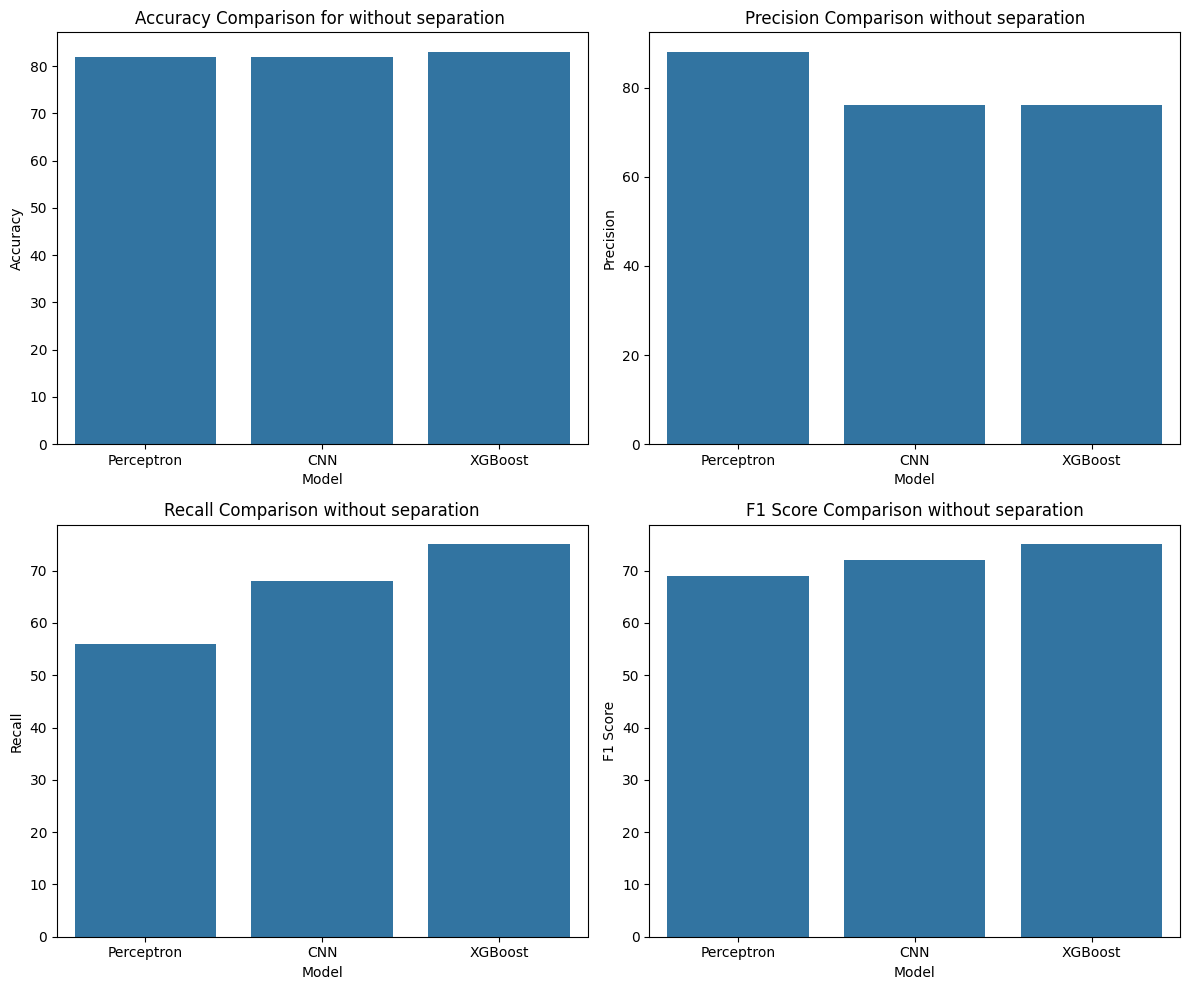

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'Model': ['Perceptron', 'CNN', 'XGBoost'],
    'Accuracy': [82, 82, 83],
    'Precision': [88, 76, 76],
    'Recall': [56, 68, 75],
    'F1 Score': [69, 72, 75]
}

df = pd.DataFrame(data)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.barplot(x='Model', y='Accuracy', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Accuracy Comparison for without separation ')

sns.barplot(x='Model', y='Precision', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Precision Comparison without separation')

sns.barplot(x='Model', y='Recall', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Recall Comparison without separation' )

sns.barplot(x='Model', y='F1 Score', data=df, ax=axes[1, 1])
axes[1, 1].set_title('F1 Score Comparison without separation')

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

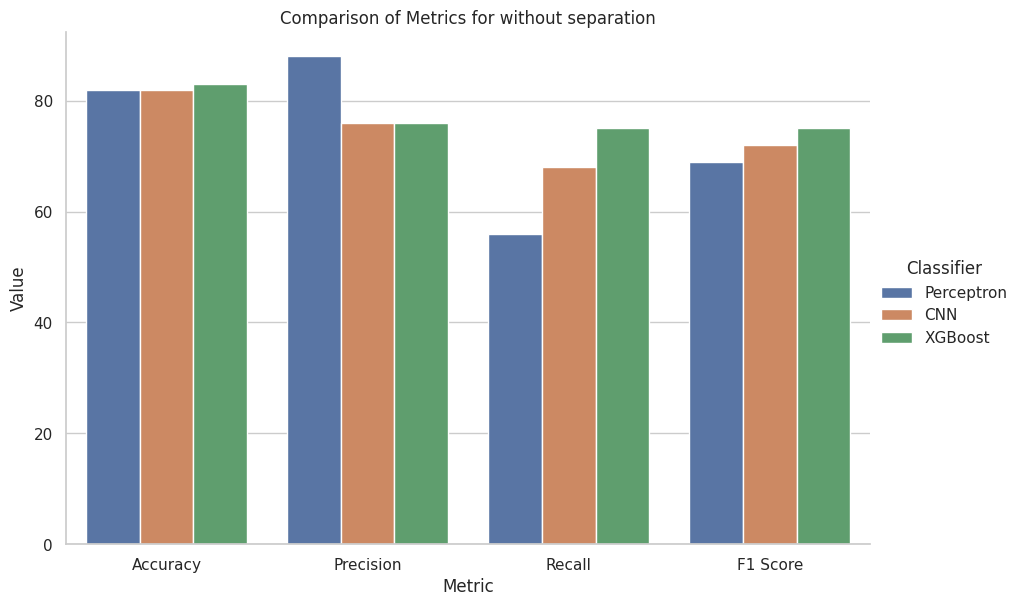

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# مقادیر معیارها برای هر کلاسیفایر
classifiers = ["Perceptron", "CNN", "XGBoost"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# ایجاد DataFrame
data = {
    "Classifier": sum([[c] * len(metrics) for c in classifiers], []),
    "Metric": metrics * len(classifiers),
    "Value": [82, 88, 56, 69,
              82, 76, 68, 72,
              83, 76, 75, 75]
}

df = pd.DataFrame(data)

# ایجاد نمودار Facet
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

g = sns.catplot(
    x="Metric", y="Value", hue="Classifier",
    data=df, kind="bar",
    height=6, aspect=1.5
)

# افزودن عنوان
plt.title('Comparison of Metrics for without separation')

# نمایش نمودار
plt.show()


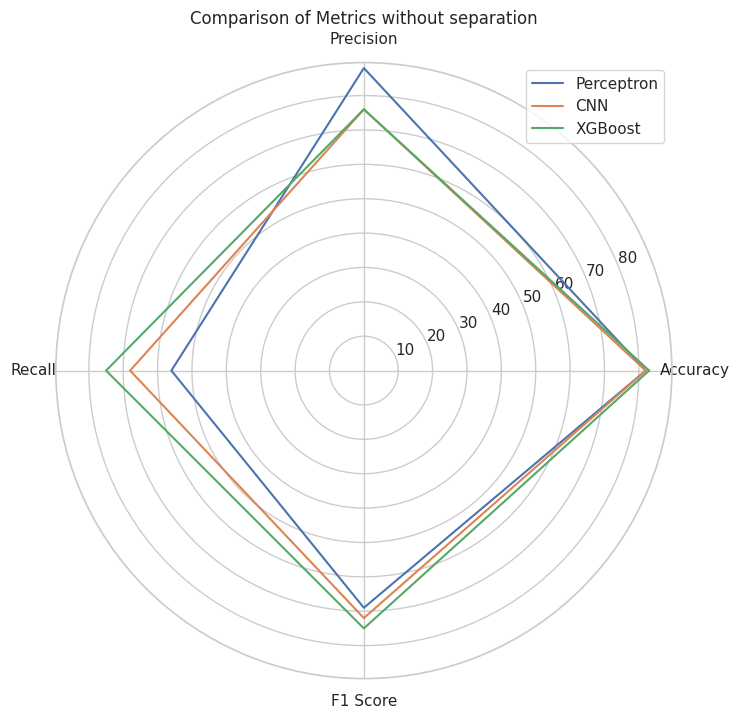

In [4]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
perceptron_values = [82, 88, 56, 69]
cnn_values = [82, 76, 68, 72]
xgboost_values = [83, 76, 75, 75]

num_dimensions = len(labels)

angles = np.linspace(0, 2 * np.pi, num_dimensions, endpoint=False).tolist()

angles += angles[:1]

plt.figure(figsize=(8, 8))

plt.polar(angles, perceptron_values + perceptron_values[:1], label='Perceptron')
plt.polar(angles, cnn_values + cnn_values[:1], label='CNN')
plt.polar(angles, xgboost_values + xgboost_values[:1], label='XGBoost')

plt.xticks(angles[:-1], labels)

plt.title('Comparison of Metrics without separation')

plt.legend()

plt.show()
